# Quantum Phase Estimation

# Example T-gate

Here we want to use QPE to estimate the eigenvalue of the T-gate. The T-gate is defined as:

\begin{equation}
T = \begin{pmatrix}
1 & 0 \\
0 & e^{4i \pi } 
\end{pmatrix}
\end{equation}

Since $T\left|1\right> = e^{2\pi i \theta} \left| 1 \right>$, where $\theta = \frac{1}{8}$.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import qiskit as qsk 

Here we will use 1 ancilla qubit that has the eigenstate of T and 2 qubits for the phase estimation.

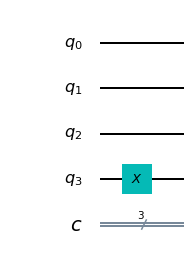

In [2]:
qpe = qsk.QuantumCircuit(4,3)
qpe.x(3) #Putting the ancilla in the eigenstate
qpe.draw('mpl')

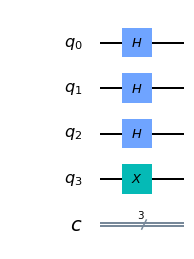

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw('mpl')

Let's apply the controlled unitary opperations.

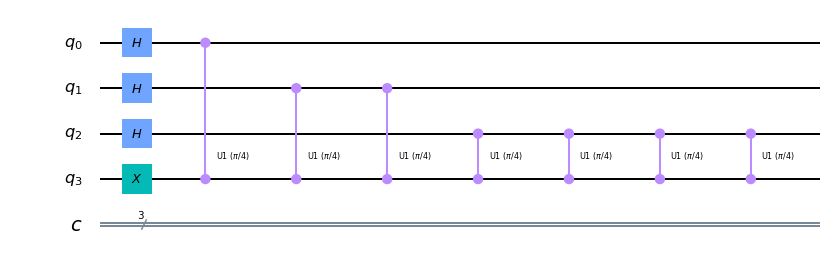

In [4]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(np.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
qpe.draw(output='mpl')

Now we apply the fourier transform for the 3 qpe qubits

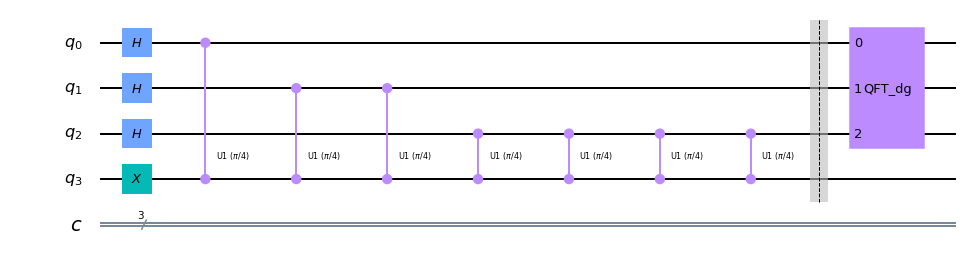

In [5]:
from Algorithms import inverse_QFT
qpe.barrier()
inverse_QFT(qpe,3)
qpe.draw('mpl')

Let's measure the first 3 qubits

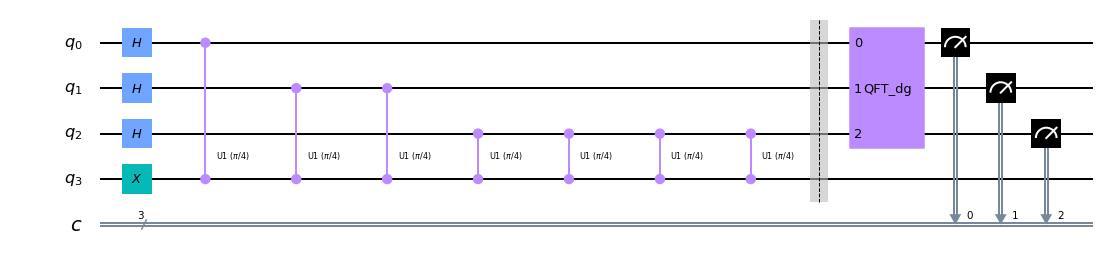

In [6]:
qpe.measure(range(3),range(3))
qpe.draw('mpl')

## Simulations 

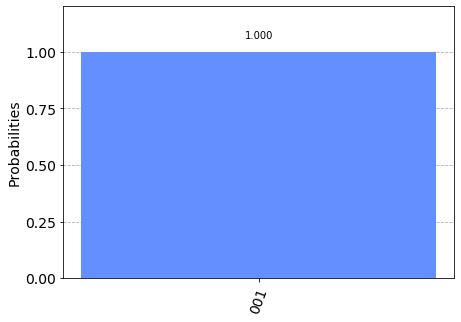

In [7]:
from qiskit.visualization import plot_histogram

backend = qsk.Aer.get_backend('qasm_simulator')
shots = 2048
results = qsk.execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [8]:
def conv2float(ans):
    fl=0
    for i,val in enumerate(ans):
        if val == '1':
            fl += 2**(-i-1)
    return fl
    
ans = max(answer, key=answer.get)
print(f'answer binary: {ans}')
print(f'answer float: {conv2float(ans)}')

answer binary: 001
answer float: 0.125


Therefore we have the result being: $\left| 001 \right>$, then: $0*2^{-1} + 0*2^{-2} + 1*2^{-3} = 0.125$ that is near our desired result:  $\theta =\frac{1}{8} = 0.125$

# T-Gate without the eigenvector on the ancilla

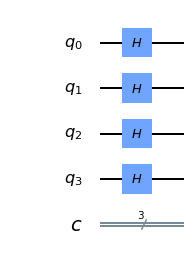

In [9]:
qpe = qsk.QuantumCircuit(4,3)
qpe.h(3) #Putting the ancilla in the eigenstate
qpe.h(range(3))
qpe.draw('mpl')

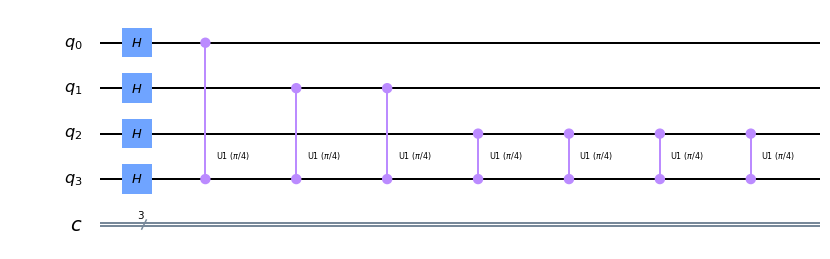

In [10]:
repetitions = 1
for counting_qubit in range(3):
    for _ in range(repetitions):
        qpe.cu1(np.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
qpe.draw(output='mpl')

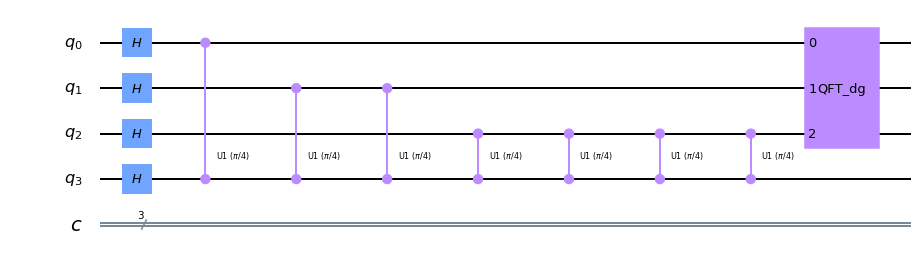

In [11]:
from Algorithms import inverse_QFT
inverse_QFT(qpe,3)
qpe.draw('mpl')

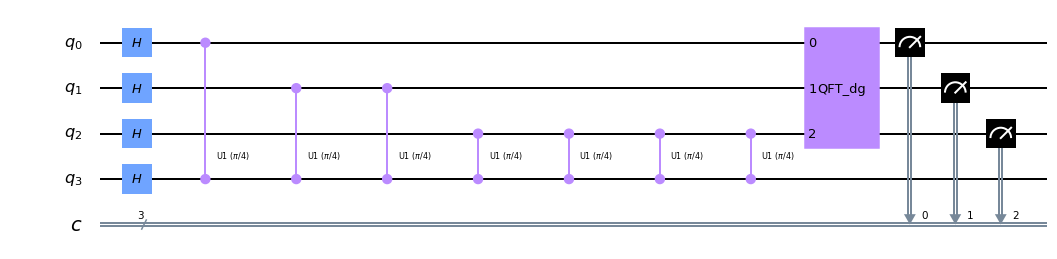

In [12]:
qpe.measure(range(3),range(3))
qpe.draw('mpl')

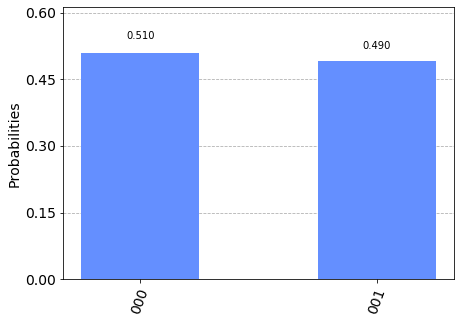

In [14]:
from qiskit.visualization import plot_histogram

backend = qsk.Aer.get_backend('qasm_simulator')
shots = 2048
results = qsk.execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

# Making the general algorithm

In the general algorithm we want to do the quantum phase estimation on a arbitrary unitary U.

In [2]:
from Algorithms import qpe
T = [[1.,0.],[0.,np.exp(-4.j*np.pi)]]
n_ancilla = 1
n_precision = 3
qc = qsk.QuantumCircuit(n_precision+n_ancilla)
qpe(qc, T, n_precision, n_ancilla)
qc.draw()

┌───┐┌───────────────┐                                                   »
q_0: ┤ H ├┤0              ├───────────────────────────────────────────────────»
     ├───┤│               │┌───────────────┐┌───────────────┐                 »
q_1: ┤ H ├┤               ├┤0              ├┤0              ├─────────────────»
     ├───┤│  Controlled_U ││               ││               │┌───────────────┐»
q_2: ┤ H ├┤               ├┤  Controlled_U ├┤  Controlled_U ├┤0              ├»
     ├───┤│               ││               ││               ││  Controlled_U │»
q_3: ┤ H ├┤1              ├┤1              ├┤1              ├┤1              ├»
     └───┘└───────────────┘└───────────────┘└───────────────┘└───────────────┘»
«                                                        ┌─────────┐
«q_0: ───────────────────────────────────────────────────┤0        ├
«                                                        │         │
«q_1: ───────────────────────────────────────────────────┤1 QFT_dg ├
«     ┌───────────────┐┌───────────────┐┌───────────────┐│         │
«q_2: ┤0              ├┤0              ├┤0              ├┤2        ├
«     │  Controlled_U ││  Controlled_U ││  Controlled_U │└─────────┘
«q_3: ┤1              ├┤1              ├┤1              ├───────────
«     └───────────────┘└───────────────┘└───────────────┘

----------------------------------------------------------------------------------------------------

In [94]:
import qiskit.tools.jupyter
%qiskit_version_table